In [1]:
import pandas
import pylab
from load_figures import open_figure
from numpy import array

In [2]:
def read_real_data_csv(file, to_plot=False):
    data = pandas.read_csv(file)
    
    if to_plot:
        y = [float(data['Dato'][x]) for x in range(1, 63)]
        x = range(len(y1))
        pylab.plot(x, y)
    return data

In [3]:
def write_data_from_dataframe_to_file(data_frames, file, to_print=False):
    data_to_save = {}
    
    
    for data in data_frames:
        data_to_save.setdefault(data.columns[2], [])
        
        for periodo, number in zip(data.Periodo, data[data.columns[2]]):
            
            date = periodo.split(' ')
            if int(date[1]) > 3 and date[2] == '(Marzo)' or date[2] == '(Abril)' or date[2] == '(Mayo)':
                data_to_save[data.columns[2]].append(float(number))
                
                if to_print:
                    print(float(number))
                    
    pandas.DataFrame(data_to_save).to_csv(file)

In [4]:
#GET DATA FROM .CSV FILES
total_infections = read_real_data_csv('data/total_infections.csv', to_plot=False)
deads = read_real_data_csv('data/deads.csv', to_plot=False)
cure = read_real_data_csv('data/cure.csv', to_plot=False)

In [5]:
#GET ACTIVES INFECTIONS
infections = total_infections.copy()
active_infections = array(total_infections.Infect) - array(deads.Dead) - array(cure.Cure)

infections.Infect = list(active_infections)
infections.to_csv('data/infections.csv')

In [6]:
#WRITE DATA TO FILES
write_data_from_dataframe_to_file([infections, deads, cure], 'figures/Figure_0.csv')

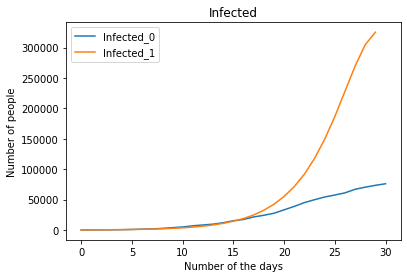

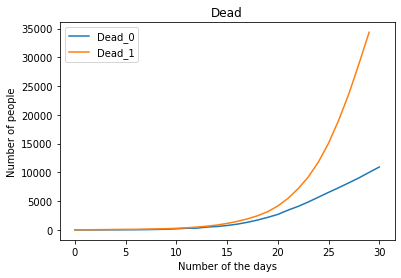

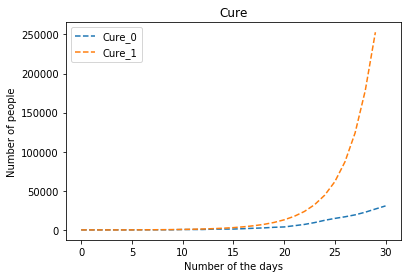

In [7]:
#COMPARE
open_figure(0, 0, infected_pop=True, healthy_pop=False, dead_pop=False, cure_pop=False, title='Infected')
open_figure(1, 0, infected_pop=True, healthy_pop=False, dead_pop=False, cure_pop=False, title='Infected')

open_figure(0, 1, infected_pop=False, healthy_pop=False, dead_pop=True, cure_pop=False, title='Dead')
open_figure(1, 1, infected_pop=False, healthy_pop=False, dead_pop=True, cure_pop=False, title='Dead')

open_figure(0, 2, infected_pop=False, healthy_pop=False, dead_pop=False, cure_pop=True, title='Cure')
open_figure(1, 2, infected_pop=False, healthy_pop=False, dead_pop=False, cure_pop=True, title='Cure')